#1. wordcloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob, os

path = '/content/drive/MyDrive/머신러닝/data/topics'
all_files = glob.glob(os.path.join(path, "*.data"))

In [ ]:
# 파일 목록 만들기
filename_list = []

for file in all_files:
    # 경로 등 제거 후 순수 파일명만 저장
    filename_ = file.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)

filename_list

['battery-life_ipod_nano_8gb',
 'updates_garmin_nuvi_255W_gps',
 'video_ipod_nano_8gb',
 'size_asus_netbook_1005ha',
 'accuracy_garmin_nuvi_255W_gps',
 'speed_garmin_nuvi_255W_gps',
 'battery-life_netbook_1005ha',
 'directions_garmin_nuvi_255W_gps',
 'screen_ipod_nano_8gb',
 'features_windows7',
 'satellite_garmin_nuvi_255W_gps',
 'voice_garmin_nuvi_255W_gps',
 'screen_netbook_1005ha',
 'sound_ipod_nano_8gb',
 'speed_windows7',
 'display_garmin_nuvi_255W_gps',
 'keyboard_netbook_1005ha',
 'screen_garmin_nuvi_255W_gps',
 'room_holiday_inn_london',
 'comfort_toyota_camry_2007',
 'service_holiday_inn_london',
 'buttons_amazon_kindle',
 'service_swissotel_hotel_chicago',
 'fonts_amazon_kindle',
 'staff_swissotel_chicago',
 'eyesight-issues_amazon_kindle',
 'location_holiday_inn_london',
 'price_amazon_kindle',
 'price_holiday_inn_london',
 'performance_netbook_1005ha',
 'food_swissotel_chicago',
 'gas_mileage_toyota_camry_2007',
 'battery-life_amazon_kindle',
 'interior_toyota_camry_2007',

In [ ]:
import pandas as pd

opinion_text = []

for file in all_files:
    # 각 파일 데이터 프레임으로 생성 후 to_string으로 text화
    df = pd.read_table(file, index_col=None, header=0, encoding='latin1')
    opiniontext = df.to_string().replace("    ", "") # 첫 공백 제거
    opinion_text.append(opiniontext)
    
# 파일명, 파일내용을 데이터 프레임으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ...
1,updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid $...
2,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the bu..."
3,size_asus_netbook_1005ha,A few other things I'd like to point out is ...
4,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for..."


In [ ]:
document_df['opinion_text'][0]

"   short battery life  I moved up from an 8gb .\n0I love this ipod except for the battery life .\n1   long battery  scratch resistant\n2   Battery drains even if I don't use it .\n3 I only wonder why the battery seems to drain when I'm not using it, even after sliding the top control button to off when shutting down .\n4 great in the car, light, portable, good quality, long battery,scratch resistant .\n5   5G lies a more mature iPod, many steps wiser and more able than its one, year, old  The iPod gains many incremental improvements, including a brighter screen and better video battery life, but probably the most appealing aspect is the tantalizing price points of $249 for the 30GB version and $349 for the huge 80GB version   .\n6   5GB and the better battery life rated for up to 6 .\n7battery, not dummie proof  I love the color of this iPod .\n8  Battery life isn't amazing, Definitely need to get a case for it  I wanted to get a new iPod because I was upgrading from the mini .\n9  Th

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)
    
    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)
    
    # 단어 원형 추출
    return LemTokens(word_tokens)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words = 'english', ngram_range=(1, 2), tokenizer=LemNormalize, min_df=0.05, max_df=0.85)

opinion_text_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
opinion_text_vect

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


<51x4622 sparse matrix of type '<class 'numpy.float64'>'
	with 30886 stored elements in Compressed Sparse Row format>

In [ ]:
# kmeans를 이용하여 클러스터가 7개인 군집화를 진행하고 label을 출력하시오
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=7, max_iter=1000, random_state=62)
km_cluster.fit(opinion_text_vect)

KMeans(max_iter=1000, n_clusters=7, random_state=62)

In [ ]:
cluster_label = km_cluster.labels_
cluster_label
document_df['label'] = cluster_label
document_df

In [ ]:
for i in range(7):
  print(document_df[document_df['label']==i])
  print('='*40)

In [ ]:
# 클러스터를 3으로 지정하여 위의 과정을 실습해보시오.
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=1000, random_state=62)
km_cluster.fit(opinion_text_vect)

KMeans(max_iter=1000, n_clusters=3, random_state=62)

In [ ]:
document_df.drop(['label'], axis=1, inplace=True)
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ...
1,updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid $...
2,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the bu..."
3,size_asus_netbook_1005ha,A few other things I'd like to point out is ...
4,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for..."


In [ ]:
cluster_label = km_cluster.labels_
cluster_label
document_df['label'] = cluster_label
document_df

,filename,opinion_text,label
0,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb ...,2
1,updates_garmin_nuvi_255W_gps,Another thing to consider was that I paid $...,1
2,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the bu...",2
3,size_asus_netbook_1005ha,A few other things I'd like to point out is ...,2
4,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for...",1
5,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of ...,1
6,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh ...",2
7,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken di...,1
8,screen_ipod_nano_8gb,"As always, the video screen is sharp and bri...",2
9,features_windows7,"I had to uninstall anti, virus and selected...",2


In [ ]:
for i in range(3):
  print(document_df[document_df['label']==i])
  print('='*40)

                           filename  \
18          room_holiday_inn_london   
20       service_holiday_inn_london   
22  service_swissotel_hotel_chicago   
24          staff_swissotel_chicago   
26      location_holiday_inn_london   
28         price_holiday_inn_london   
30           food_swissotel_chicago   
34          rooms_swissotel_chicago   
36          food_holiday_inn_london   
37    parking_bestwestern_hotel_sfo   
38      rooms_bestwestern_hotel_sfo   
42       free_bestwestern_hotel_sfo   
43   location_bestwestern_hotel_sfo   
44      staff_bestwestern_hotel_sfo   
45    service_bestwestern_hotel_sfo   
49   bathroom_bestwestern_hotel_sfo   

                                         opinion_text  label  
18  We arrived at 23,30 hours and they could not r...      0  
20  not customer, oriented hotelvery low service l...      0  
22  Mediocre room and service for a very extravaga...      0  
24    The staff at Swissotel were not particularly...      0  
26  Great location fo

In [ ]:
cluster_centers = km_cluster.cluster_centers_
cluster_centers.shape

(3, 4622)

In [ ]:
cluster_centers[0].argsort()

array([2288, 2274, 1560, ..., 3666, 2126, 3486])

In [ ]:
print(cluster_centers[0][2288])
print(cluster_centers[0][3486])

0.0
0.2606665414829179


In [ ]:
cluster_centers.argsort()[:]
cluster_centers.argsort()[:, 0]
cluster_centers.argsort()[:, ::-1]

array([[3486, 2126, 3666, ..., 1560, 2274, 2288],
       [2730, 1392, 2676, ..., 2683, 2682, 2310],
       [3590,  730, 2281, ..., 2309, 2298, 2310]])

In [ ]:
cluster_centers_sort = cluster_centers.argsort()[:, ::-1]
cluster_centers_sort

array([[3486, 2126, 3666, ..., 1560, 2274, 2288],
       [2730, 1392, 2676, ..., 2683, 2682, 2310],
       [3590,  730, 2281, ..., 2309, 2298, 2310]])

In [ ]:
top_keywords = cluster_centers_sort[0, :10]
top_keywords

array([3486, 2126, 3666, 3886, 1763, 2544, 1032,  724, 3180, 3006])

In [ ]:
feature_names = tfidf_vect.get_feature_names()
feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '0 5',
 '0 room',
 '00',
 '02',
 '05',
 '06',
 '07',
 '08',
 '0i',
 '0the',
 '1 2',
 '1 block',
 '1 great',
 '10 did',
 '10 inch',
 '10 min',
 '10 minute',
 '10 room',
 '100',
 '100 accurate',
 '1005ha',
 '101',
 '102',
 '103',
 '104',
 '105',
 '105 room',
 '106',
 '106the',
 '107',
 '108',
 '109',
 '10it',
 '110',
 '111',
 '112',
 '113',
 '114',
 '114the',
 '115',
 '116',
 '117',
 '118',
 '119',
 '11the',
 '12 great',
 '120',
 '121',
 '121 hotel',
 '122',
 '123',
 '124',
 '125',
 '126',
 '126 staff',
 '127',
 '127the',
 '128',
 '129',
 '13',
 '130',
 '130the',
 '131',
 '131 room',
 '131we',
 '132',
 '133',
 '134',
 '134 room',
 '135',
 '135the',
 '136',
 '137',
 '138',
 '139',
 '139the',
 '13the',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '14the',
 '15 minute',
 '15 second',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '15the',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',

In [ ]:
for idx in top_keywords:
  print(feature_names[idx])

room
hotel
service
staff
food
location
clean
bathroom
price
parking


In [ ]:
!pip3 install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 40.8 MB/s 


In [ ]:
from konlpy.corpus import kolaw

kolaw.fileids()

['constitution.txt']

In [ ]:
txt = kolaw.open('constitution.txt').read()
print(txt[:100])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의


In [ ]:
from konlpy.corpus import kobill

kobill.fileids()

['1809895.txt',
 '1809897.txt',
 '1809898.txt',
 '1809891.txt',
 '1809896.txt',
 '1809893.txt',
 '1809894.txt',
 '1809899.txt',
 '1809890.txt',
 '1809892.txt']

In [ ]:
txt = kobill.open('1809895.txt').read()
print(txt[:100])

하도급거래 공정화에 관한 법률 일부개정법률안

(유선호의원 대표발의 )

 의 안
 번 호

9895

발의연월일 : 2010.  11.  15.

발  의  자 : 유선호․강기갑


In [ ]:
txt[:100]
from konlpy.tag import Hannanum

han = Hannanum()
han.nouns(txt[:100])

['대한민국헌법',
 '유구',
 '역사',
 '전통',
 '빛',
 '우리',
 '대한국민',
 '3·1운동',
 '건립',
 '대한민국임시정부',
 '법통',
 '불의',
 '항거',
 '4·19민주이념',
 '계승',
 '조국',
 '민주개혁',
 '평화적',
 '통일']

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.nouns(txt[:100])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임시정부',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '4',
 '19',
 '19민주이념',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '개혁',
 '평화적',
 '통일']

In [ ]:
from konlpy.tag import Komoran

komo = Komoran()
komo.nouns(txt[:100])

['대한민국',
 '헌법',
 '역사',
 '전통',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시',
 '정부',
 '법통',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주개혁',
 '평화',
 '통일']

In [ ]:
from konlpy.tag import Okt
okt = Okt()
okt.nouns(txt[:100])

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주',
 '개혁',
 '평화',
 '통일']

In [ ]:
okt.morphs(txt[:100])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로',
 '건립',
 '된',
 '대한민국',
 '임시정부',
 '의',
 '법',
 '통과',
 '불의',
 '에',
 '항거',
 '한',
 '4',
 '·',
 '19',
 '민주',
 '이념',
 '을',
 '계승',
 '하고',
 ',',
 '조국',
 '의',
 '민주',
 '개혁',
 '과',
 '평화',
 '적',
 '통일',
 '의']

In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
okt.pos(txt[:100])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임시정부', 'Noun'),
 ('의', 'Josa'),
 ('법', 'Noun'),
 ('통과', 'Noun'),
 ('불의', 'Noun'),
 ('에', 'Josa'),
 ('항거', 'Noun'),
 ('한', 'Josa'),
 ('4', 'Number'),
 ('·', 'Punctuation'),
 ('19', 'Number'),
 ('민주', 'Noun'),
 ('이념', 'Noun'),
 ('을', 'Josa'),
 ('계승', 'Noun'),
 ('하고', 'Josa'),
 (',', 'Punctuation'),
 ('조국', 'Noun'),
 ('의', 'Josa'),
 ('민주', 'Noun'),
 ('개혁', 'Noun'),
 ('과', 'Josa'),
 ('평화', 'Noun'),
 ('적', 'Suffix'),
 ('통일', 'Noun'),
 ('의', 'Josa')]

In [ ]:
words = okt.nouns(txt)
words[:20]

['대한민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '운동',
 '건립',
 '대한민국',
 '임시정부',
 '법',
 '통과',
 '불의',
 '항거',
 '민주',
 '이념',
 '계승',
 '조국',
 '민주']

In [ ]:
for word in words[:20]:
  if len(word)>1:
    print(word)

대한민국
헌법
유구
역사
전통
우리
국민
운동
건립
대한민국
임시정부
통과
불의
항거
민주
이념
계승
조국
민주


In [ ]:
words_up2 = [n for n in words if len(n)>1]

In [ ]:
from collections import Counter

counts = Counter(words_up2)
counts

Counter({'가격': 1,
         '가부': 1,
         '가입': 2,
         '가족': 2,
         '가지': 2,
         '가치': 1,
         '각인': 1,
         '각하': 1,
         '각항': 1,
         '간첩죄': 1,
         '감봉': 1,
         '감사': 6,
         '감사원': 5,
         '감사원장': 2,
         '감찰': 1,
         '감형': 3,
         '강요': 1,
         '강제': 1,
         '강화': 2,
         '강화조약': 1,
         '개발': 6,
         '개선': 1,
         '개시': 5,
         '개인': 3,
         '개정': 6,
         '개정안': 5,
         '개혁': 1,
         '거나': 13,
         '거듭': 1,
         '거주': 1,
         '건립': 1,
         '건의': 3,
         '검사': 4,
         '검열': 1,
         '검찰총장': 1,
         '결과': 1,
         '결사': 3,
         '결산': 3,
         '결정': 6,
         '경과': 1,
         '경비': 2,
         '경비계엄': 1,
         '경시': 1,
         '경영': 2,
         '경우': 17,
         '경의': 1,
         '경제': 18,
         '경제력': 1,
         '경찰': 1,
         '계급': 1,
         '계속': 4,
         '계승': 2,
         '계약': 3,
         '계엄': 5,
         '계획'

In [ ]:
noun_lst = counts.most_common(40)
noun_lst[:15]

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21),
 ('의원', 21),
 ('자유', 20),
 ('정부', 20),
 ('선거', 20),
 ('임명', 20)]

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as fm  # 폰트 관련 용도

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
for nanum in nanum_font:
  print(nanum)

sys_font number: 27
['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/Libera

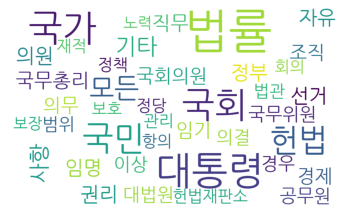

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(width=1000, height=600, font_path=font_path, background_color='white')
plt.imshow(wc.generate_from_frequencies(dict(noun_lst)))
plt.axis('off')
plt.show()

#2. 네이버 영화 추천

In [72]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f9df21454d0>)

In [73]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [74]:
train_data.isnull().sum()

id          0
document    8
label       0
dtype: int64

In [77]:
train_data.dropna(how='any', inplace=True)
train_data.isnull().values.any()

False

In [79]:
train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [86]:
from konlpy.tag import Okt

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


okt = Okt()
txt1 = okt.morphs(train_data['document'][1], stem=True)
txt2 = okt.morphs(train_data['document'][1], stem=False)

# print(txt1)
# print(txt2)

for word in txt1:
  if word in stopwords:
    print(word)

으로
와
들
이
하다
이
에
이
와
들
이


In [89]:
# 위의 내용을 이용하여 모든 후기의 불용어가 제거된 내용을 리스트에 저장하시오.
from konlpy.tag import Okt
# 진행 상태를 막대바로 표현하기 위한 함수
from tqdm import tqdm

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
  # stem은 True일 경우 원형을 찾아냄
  tokenized_sentence = okt.morphs(sentence, stem=True) #토큰화
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
  tokenized_data.append(stopwords_removed_sentence)

tokenized_data

100%|██████████| 199992/199992 [2:05:25<00:00, 26.58it/s]


[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어려운',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '갈수',
  '있다',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '없다', '최고'],
 ['오다',
  '연기',
  '진짜',
  '개',
  '쩔다',
  '지루하다',
  '생각',
  '몰입',
  '보다',
  '다그',
  '래',
  '이렇다',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱하다', '밤하늘', '뜨다', '초승달', '같다', '영화'],
 ['사랑', '을', '해보다', '사람', '라면', '처음', '부터', '끝', '까지', '웃다', '영화'],
 ['완전', '감동', '이다', '보다', '감동'],
 ['개', '전쟁', '나오다', '나오다', '빠', '로', '보다'],
 ['굿'],
 ['바보', '아니다', '병', '쉬다'],
 ['내',
  '나이',
  '같다',
  '영화',
  '지금',
  '보다',
  '감동',
  '적',
  '이다',
  '하지만',
  '훗',
  '날다',
  '보다',
  '사하나',
  '하',
  '나',
  '그',
  '감정',
  '을',
  '완벽하다',
  '같다'],
 ['재밌다'],
 ['고질', '라니', '무', '귀엽다', '능', 'ㅋㅋ'],
 [

In [90]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window=5, min_count=5, workers=4, sg=0)
model.wv.vectors.shape

(17947, 100)

In [91]:
model.wv.most_similar('한석규')

[('박신양', 0.9004462957382202),
 ('최민식', 0.8996750116348267),
 ('신들리다', 0.8960625529289246),
 ('안성기', 0.8881646394729614),
 ('유오성', 0.8857970237731934),
 ('이미숙', 0.8840218186378479),
 ('송강호', 0.8812744617462158),
 ('워싱턴', 0.8744343519210815),
 ('설경구', 0.8743810653686523),
 ('최민수', 0.8742563724517822)]

In [92]:
model.wv.most_similar('무협')

[('느와르', 0.8918212652206421),
 ('히어로', 0.8648594617843628),
 ('호러', 0.86176997423172),
 ('블록버스터', 0.8538388013839722),
 ('홍콩', 0.8483963012695312),
 ('슬래셔', 0.8480455875396729),
 ('헐리웃', 0.8441081643104553),
 ('교과서', 0.8341106176376343),
 ('헐리우드', 0.8296211957931519),
 ('첩보', 0.8263773322105408)]

In [93]:
model.wv.most_similar('몰입')

[('집중', 0.8933126926422119),
 ('감정이입', 0.720055341720581),
 ('긴장', 0.6857448816299438),
 ('몰입도', 0.6575719118118286),
 ('연결', 0.6559643745422363),
 ('긴박', 0.6242348551750183),
 ('흥미진진', 0.621523380279541),
 ('예상', 0.6117324233055115),
 ('진행', 0.605211615562439),
 ('이해도', 0.6001999378204346)]